# Project

Studen names and IDs: 

Name: Yuvraj Singh

Student ID:  200670570

Name:  Meer Baloch

Student ID:  200302900

## Visualization 1

### Question: What are the densities of each geolocated named location across Canada?

The following visualization shows the density of each geolocated named location across Canada. A named place is defined as, large and small cities, villages, First Nations Communities, Small Hamlets etc. The greater the cluster, the higher the density. The visualization shows that the highest density of named locations is in the province of Ontario, followed by Quebec. The visualization also shows that the lowest density of named locations are in the Territories.

https://open.canada.ca/data/en/dataset/fe945388-1dd9-4a4a-9a1e-5c552579a28c



Text(160.25, 0.5, 'Latitude')

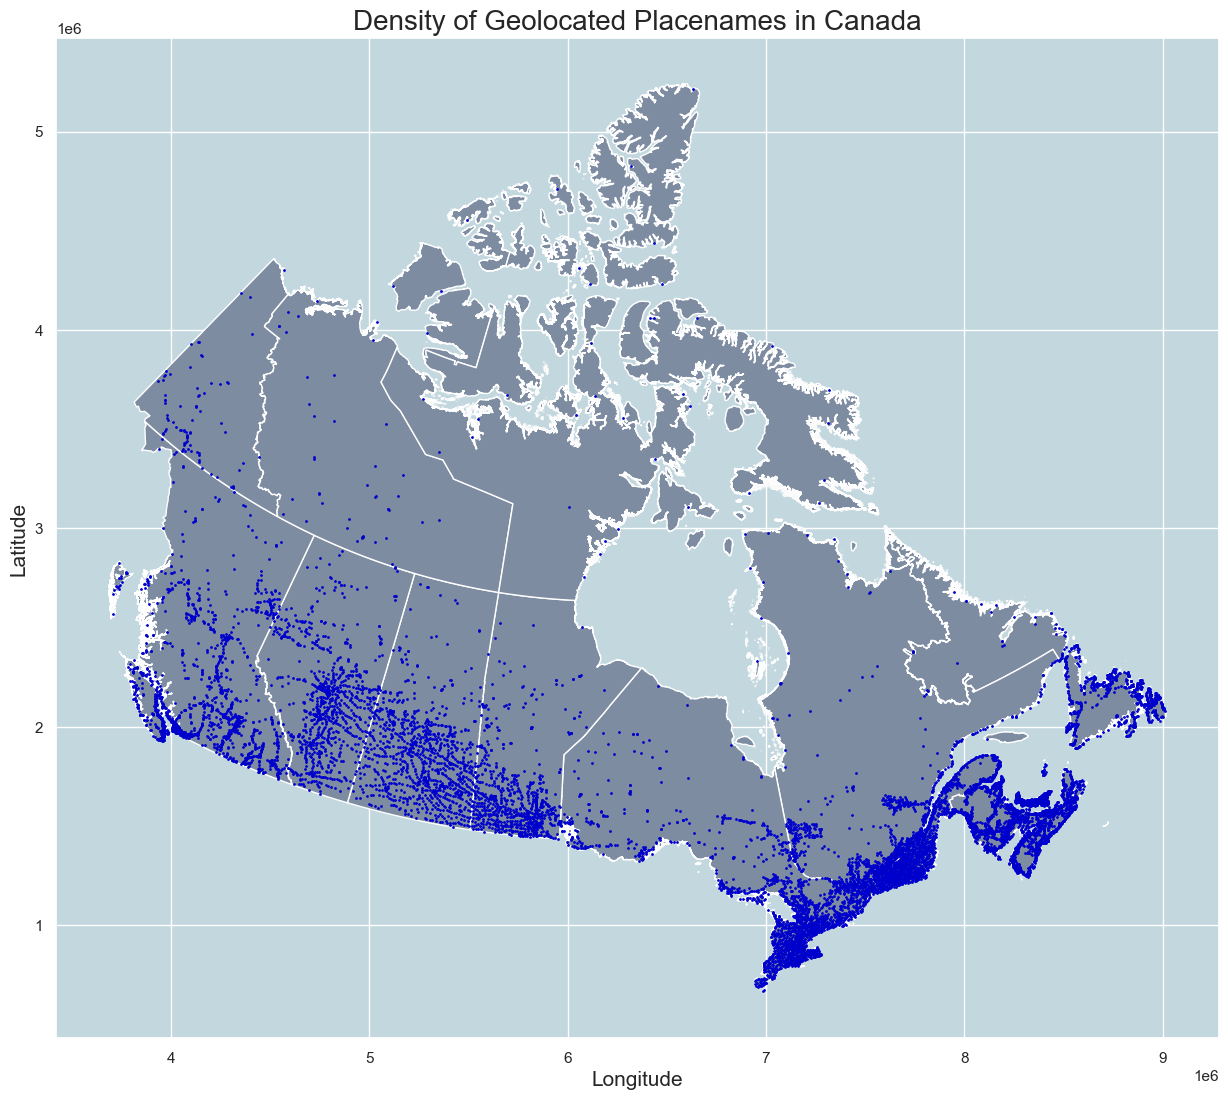

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import country_converter as coco
sns.set()

df1 = pd.read_csv('data/MAG_EXO.csv', encoding = 'latin-1')
df1.drop(columns=['PNuid_NLidu', 'Nom_fr'], inplace=True)

#LOAD CANADA MAP
canada = geopandas.read_file('data/lpr_000b16a_e.shp')

fig, ax = plt.subplots(figsize=(15, 15))

#CANADA MAP
canada.plot(ax=ax, color='#7e8ca1', edgecolor='white')
ax.set_facecolor('#c3d7df')
gdf = geopandas.GeoDataFrame(df1, geometry=geopandas.points_from_xy(df1.Longitude, df1.Latitude))

#USE SAME COORD SYSTEM
gdf = gdf.set_crs(epsg=4326)
gdf = gdf.to_crs(canada.crs)
#plot longitude and latitudes
gdf.plot(ax=ax, color='#0000CC', markersize=1)

#add title and labels
ax.set_title('Density of Geolocated Placenames in Canada', fontsize=20)
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)


## Visualization 2

### Question: Which countries have the highest number of Covid-19 cases per capita, and how do these countries compare to the rest of the world?

The visualization consists of a choropleth map that depicts the degree of total Covid-19 cases per capita in each country. The visualization shows that the countries with the highest number of Covid-19 cases per capita are the United States, Brazil, and India. 

https://www.kaggle.com/datasets/themrityunjaypathak/covid-cases-and-deaths-worldwide


Channel Islands not found in regex
Diamond Princess not found in regex
MS Zaandam not found in regex


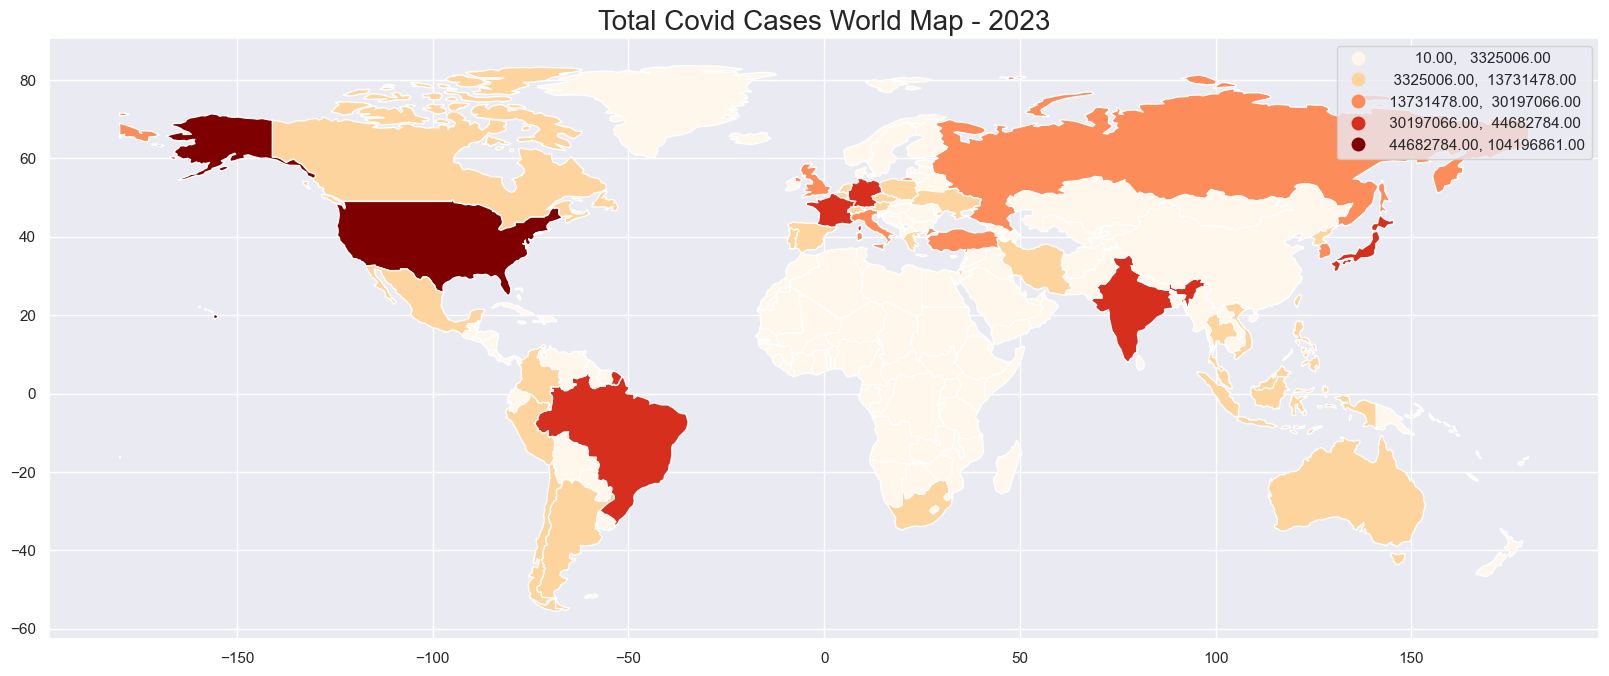

In [18]:
cc = coco.CountryConverter()

df2 = pd.read_csv('data/covid_worldwide.csv')
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
df2['Country'] = df2['Country'].replace('DRC','COD') #Congo, Dem. Rep.
df2['Country'] = df2['Country'].replace('CAR','CAF') #Central African Republic
df2['Country'] = df2['Country'].replace('UAE','ARE') #United Arab Emirates
#convert country name to ISO3 code
df2['Country'] = cc.pandas_convert(series=df2['Country'], to='ISO3')
countries = world['iso_a3'].tolist()

df2 = df2[df2['Country'].isin(countries)].reset_index(drop=True)
df2 = df2[['Country','Total Cases']]
#add Total Cases to world where the iso_a3 code matches the country code
world['Total Cases'] = world['iso_a3'].map(df2.set_index('Country')['Total Cases'])

#convert total cases to numeric and get rid of commas
world['Total Cases'] = pd.to_numeric(world['Total Cases'].str.replace(',',''), errors='coerce').astype(float)
#plot world map 
world.plot(column='Total Cases', cmap='OrRd', scheme='natural_breaks', legend=True, figsize=(20,10))
plt.title('Total Reported Covid Cases World Map - 2023', fontsize=20)
plt.show()



## Visualization 3

### Question: To what degree does ocean proximity influence the median house value in California?

The visualization is an overlapping density plot that displays the density of median house values in California. The density curve hues indicate the proximity of the houses to the ocean. The plot shows that the highest density of median house values is concentrated around $50,000-$250,000 range, with the majority of the houses being located within 1 hour of the ocean. There are also some areas where the density of median house values is lower, indicating that houses in those areas may be more expensive or less common.

https://www.kaggle.com/datasets/camnugent/california-housing-prices

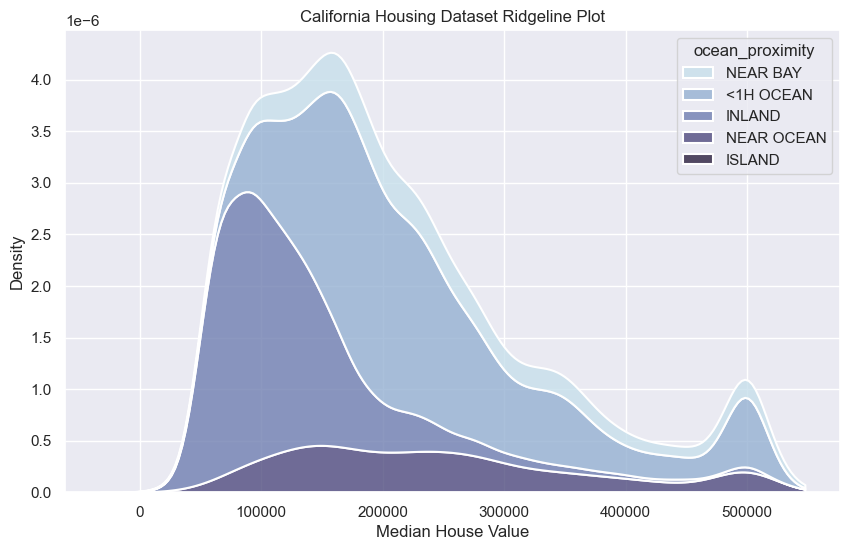

In [3]:
df3 = pd.read_csv('data/housing.csv')
df3 = df3[['median_house_value', 'ocean_proximity']]
fig, ax = plt.subplots(figsize=(10,6))

# Create the ridgeline plot
sns.kdeplot(data=df3, x="median_house_value", hue="ocean_proximity",
            fill=True, alpha=0.8, linewidth=1.5, multiple="stack",
            palette="ch:s=.25,rot=-.25")

# Add axis labels and a title
ax.set_xlabel('Median House Value')
ax.set_ylabel('Density')
ax.set_title('California Housing Dataset Ridgeline Plot')

# Show the plot
plt.show()

## Visualization 4

### Question: What is the relationship between the world population count and population growth rate?

The visualization is a line graph that displays the relationship between the world population count and population growth rate. The visualization shows that the world population count and population growth rate are inversely proportional. 

https://www.kaggle.com/datasets/pavelbiz/world-population-1952-2020-3-sources


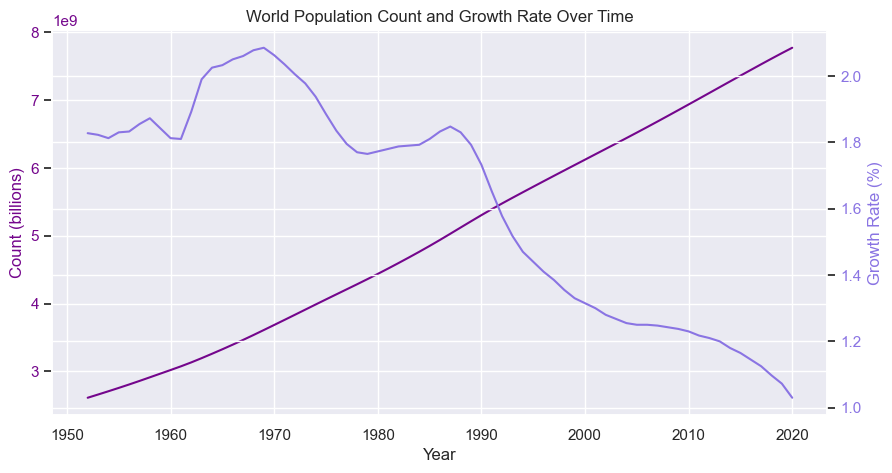

In [8]:
df4 = pd.read_csv('data/finaldata.csv')
finaldf = pd.DataFrame()
finaldf['year'] = df4['year']
#average the count and growthrate for each year
finaldf['count'] = (df4['count_zw'] + df4['count_wm'] + df4['count_mt'] + df4['count_cm'])/4
finaldf['growthrate'] = (df4['growthrate_zw'] + df4['growthrate_wm'] + df4['growthrate_mt'] + df4['growthrate_cm'])/4


fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the count data as a line plot
ax1.plot('year', 'count', data=finaldf, color='#74068c')

# Set the labels and title for the left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Count (billions)', color='#74068c')
ax1.tick_params(axis='y', labelcolor='#74068c')

# Create a second y-axis on the right side for growthrate
ax2 = ax1.twinx()

# Plot the growthrate data as a line plot
ax2.plot('year', 'growthrate', data=finaldf, color='#8a74e3')

# Set the labels and title for the right y-axis
ax2.set_ylabel('Growth Rate (%)', color='#8a74e3')
ax2.tick_params(axis='y', labelcolor='#8a74e3')

# Set the title for the entire plot
plt.title('World Population Count and Growth Rate Over Time')

# Show the plot
plt.show()

## Visualization 5

### Question: What is the overall trend of CO2 emissions from non-biomasses in Ontario from 2010 to 2020?

The visualization is a line graph that displays the trend of CO2 emissions from non-biomasses in Ontario from 2010 to 2020. The visualization shows that the overall trend of CO2 emissions from non-biomasses in Ontario is decreasing although there are some fluctuations as there was a rise in CO2 emissions from 2017 to 2018.

https://data.ontario.ca/en/dataset/greenhouse-gas-emissions-reporting-by-facility/resource/0996bfd9-ed27-4f78-8ed1-9e024185f10a

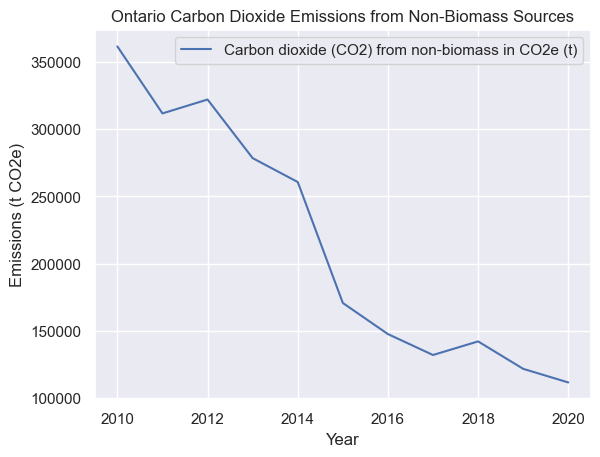

In [19]:
df5 = pd.read_csv('data/GHG_Data_2010_2020_data_Dec162021.csv', encoding = 'latin')
df5 = df5[['Year','Carbon dioxide (CO2) from non-biomass in CO2e (t)']]

df_grouped = df5.groupby('Year')['Carbon dioxide (CO2) from non-biomass in CO2e (t)'].mean().reset_index()

# create a line plot
df_grouped.plot(x='Year', y='Carbon dioxide (CO2) from non-biomass in CO2e (t)')

# set the title and axis labels
plt.title('Ontario Carbon Dioxide Emissions from Non-Biomass Sources')
plt.xlabel('Year')
plt.ylabel('Emissions (t CO2e)')

# display the plot
plt.show()